<a href="https://colab.research.google.com/github/shiraztanvir/shiraztanvir/blob/main/Decision_Tree_Car_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Dicision Tree

In [35]:
pip install pydotplus

In [36]:
# pip install graphviz - install using cmd

## Import necessary libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Load the dataset from a CSV file

In [39]:
data = pd.read_csv('car_data.csv')

## Explore the dataset with EDA

In [40]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [41]:
data.isnull().sum()

,0
User ID,0
Gender,0
Age,0
AnnualSalary,0
Purchased,0


In [49]:
data.Gender.value_counts()

,count
Gender,
Female,516
Male,484


## Visualize the dataset

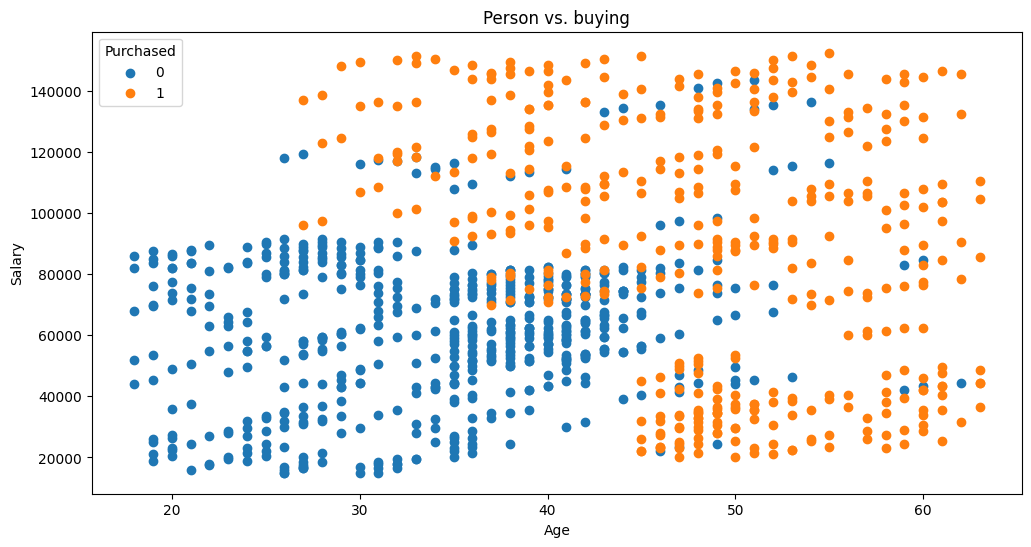

In [51]:
# Scatter plot of the features colored by class
plt.figure(figsize=(12, 6))
for purchase, buying_data in data.groupby('Purchased'):
    plt.scatter(buying_data['Age'], buying_data['AnnualSalary'], label=purchase)

plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Purchased')
plt.title('Person vs. buying')
plt.show()

In [64]:
from sklearn.preprocessing import LabelEncoder

# Assuming your 'gender' data is in a column called 'Gender' in your DataFrame 'data'
gender_data = data['Gender']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your 'Gender' labels and transform them
gender_encoded = label_encoder.fit_transform(gender_data)

# Now gender_encoded contains numerical labels (e.g., 0 for one gender, 1 for the other)

## Data Preprocessing

In [65]:
# Split the data into features and target
X = data.drop('Purchased', axis=1)
y = data['Purchased']

In [66]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree Classifier

In [74]:
print(data['Gender'].dtype)

float64


In [75]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1.0,35,20000,0
1,681,1.0,40,43500,0
2,353,1.0,49,74000,0
3,895,1.0,40,107500,1
4,661,1.0,25,79000,0


In [76]:
# Create a decision tree classifier
sha = DecisionTreeClassifier()

In [77]:
# Train the decision tree model
sha.fit(X_train, y_train)

DecisionTreeClassifier()

In [80]:
# Visualize the decision tree
dot_data = export_graphviz(
    sha,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(name) for name in y.unique()],  # Convert class names to strings
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("Car_Purchase_decision_tree.png")

True

In [81]:
# Make predictions on the testing set
y_pred = sha.predict(X_test)

In [82]:
# Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88


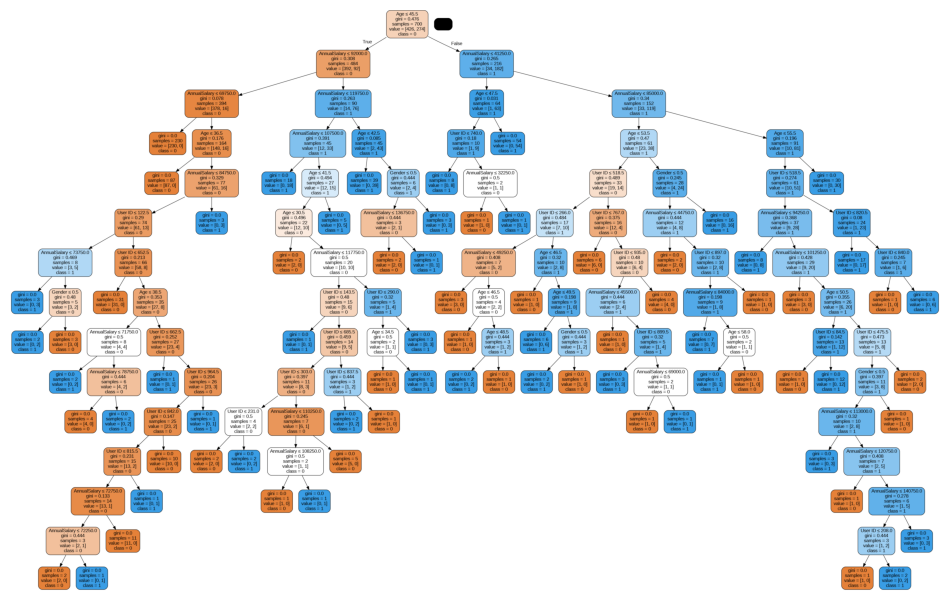

In [84]:
# Show the decision tree visualization (can be found in the current directory)
plt.figure(figsize=(12, 8))
plt.imshow(plt.imread("Car_Purchase_decision_tree.png"))
plt.axis('off')
plt.show()

# Building & Evaluating Random Forest and Gradient Boosting models

- Comparing the results with the single Decision Tree model

In [85]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [86]:
# Create and train a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
# Make predictions using Random Forest
rf_y_pred = rf_clf.predict(X_test)

In [88]:
# Evaluate Random Forest model
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
rf_precision = metrics.precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = metrics.recall_score(y_test, rf_y_pred, average='weighted')
rf_f1_score = metrics.f1_score(y_test, rf_y_pred, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90


In [89]:
# Create and train a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [90]:
# Make predictions using Gradient Boosting
gb_y_pred = gb_clf.predict(X_test)

In [91]:
# Evaluate Gradient Boosting model
gb_accuracy = metrics.accuracy_score(y_test, gb_y_pred)
gb_precision = metrics.precision_score(y_test, gb_y_pred, average='weighted')
gb_recall = metrics.recall_score(y_test, gb_y_pred, average='weighted')
gb_f1_score = metrics.f1_score(y_test, gb_y_pred, average='weighted')

# Print evaluation metrics for Gradient Boosting
print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1_score:.2f}")


Gradient Boosting Metrics:
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89


In [92]:
# Compare results with single Decision Tree
print("\nComparison with Single Decision Tree:")
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Comparison with Single Decision Tree:
Decision Tree Accuracy: 0.88
Random Forest Accuracy: 0.90
Gradient Boosting Accuracy: 0.89


# Building & Evaluating Random Forest and Gradient Boosting models

- Comparing the results with the two Decision Tree model

In [93]:
# Create and train two separate Decision Tree classifiers
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, y_train)

tree2 = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limited depth for the second tree
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [94]:
# Make predictions using the two decision trees
tree1_y_pred = tree1.predict(X_test)
tree2_y_pred = tree2.predict(X_test)

In [95]:
# Evaluate the first decision tree
tree1_accuracy = metrics.accuracy_score(y_test, tree1_y_pred)
tree1_precision = metrics.precision_score(y_test, tree1_y_pred, average='weighted')
tree1_recall = metrics.recall_score(y_test, tree1_y_pred, average='weighted')
tree1_f1_score = metrics.f1_score(y_test, tree1_y_pred, average='weighted')

In [96]:
# Evaluate the second decision tree
tree2_accuracy = metrics.accuracy_score(y_test, tree2_y_pred)
tree2_precision = metrics.precision_score(y_test, tree2_y_pred, average='weighted')
tree2_recall = metrics.recall_score(y_test, tree2_y_pred, average='weighted')
tree2_f1_score = metrics.f1_score(y_test, tree2_y_pred, average='weighted')

In [97]:
# Print evaluation metrics for the two decision trees
print("Decision Tree 1 Metrics:")
print(f"Accuracy: {tree1_accuracy:.2f}")
print(f"Precision: {tree1_precision:.2f}")
print(f"Recall: {tree1_recall:.2f}")
print(f"F1 Score: {tree1_f1_score:.2f}")

print("\nDecision Tree 2 Metrics:")
print(f"Accuracy: {tree2_accuracy:.2f}")
print(f"Precision: {tree2_precision:.2f}")
print(f"Recall: {tree2_recall:.2f}")
print(f"F1 Score: {tree2_f1_score:.2f}")

Decision Tree 1 Metrics:
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88

Decision Tree 2 Metrics:
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89


In [98]:
# Compare the results of all models
print("\nComparison of Models:")
print(f"Decision Tree 1 Accuracy: {tree1_accuracy:.2f}")
print(f"Decision Tree 2 Accuracy: {tree2_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")



Comparison of Models:
Decision Tree 1 Accuracy: 0.88
Decision Tree 2 Accuracy: 0.89
Random Forest Accuracy: 0.90
Gradient Boosting Accuracy: 0.89
